In [7]:
import h5py
import numpy as np
import PIL.Image as Image

import os
import cv2
import math
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio
from PIL import Image
from tqdm.auto import tqdm

plt.rcParams["font.size"] = 10
plt.rcParams["font.family"] = "Times New Roman"

def linstretch(images, tol=None):
    """
    NM = N*M;
    for i=1:3
        b = reshape(double(uint16(ImageToView(:,:,i))),NM,1);
        [hb,levelb] = hist(b,max(b)-min(b));
        chb = cumsum(hb);#沿第一个非单一维运算。matlab矩阵顺序 HxWxC,列的累计和
        t(1)=ceil(levelb(find(chb>NM*tol(i,1), 1 )));
        t(2)=ceil(levelb(find(chb<NM*tol(i,2), 1, 'last' )));
        %t(2) = 1;
        b(b<t(1))=t(1);
        b(b>t(2))=t(2);
        b = (b-t(1))/(t(2)-t(1));
        ImageToView(:,:,i) = reshape(b,N,M);
    end
    """
    # images = np.random.randn(64, 64, 3) * 2047.0
    if tol is None:
        tol = [0.01, 0.995]
    if images.ndim == 3:
        h, w, channels = images.shape
    else:
        images = np.expand_dims(images, axis=-1)
        h, w, channels = images.shape
    N = h * w
    # 1366 201 9 11   27   34   53   84   95  148  170  190  210  241  324  369  429  491  470  474  461  4
    # 1365 200
    for c in range(channels):
        image = np.float32(np.round(images[:, :, c])).reshape(N, 1)
        hb, levelb = np.histogram(image, bins=math.ceil(image.max() - image.min()))
        chb = np.cumsum(hb, 0)
        levelb_center = levelb[:-1] + (levelb[1] - levelb[0]) / 2
        lbc_min, lbc_max = (
            levelb_center[chb > N * tol[0]][0],
            levelb_center[chb < N * tol[1]][-1],
        )
        image = np.clip(image, a_min=lbc_min, a_max=lbc_max)
        image = (image - lbc_min) / (lbc_max - lbc_min)
        images[..., c] = np.reshape(image, (h, w))

    images = np.squeeze(images)

    return images

path = '/Data3/cao/ZiHanCao/datasets/pansharpening/pansharpening_test/test_gf2_OrigScale_multiExm1.h5'
save_path = '/Data3/cao/ZiHanCao/datasets/pansharpening/gf/figs/full'
os.makedirs(save_path, exist_ok=True)
if path.endswith('.h5'):
    f = h5py.File(path, 'r')
elif path.endswith('.mat'):
    f = sio.loadmat(path)
    
tbar = tqdm(range(len(f['pan'])))
for i in tbar:
    # img = np.array(f['GT'][i].transpose(1, 2, 0))[..., [80, 60, 40]]
    # # img = linstretch(img)
    # img = Image.fromarray((img * 255).astype(np.uint8)).resize((256, 256))
    
    img = np.array(f['SR'][i].transpose(1, 2, 0)[..., -1]) / 2047.0
    img = Image.fromarray((img * 255).astype(np.uint8)).resize((512, 512))
    
    img.save('{}/{}.jpg'.format(save_path, i))


  0%|          | 0/20 [00:00<?, ?it/s]

KeyError: "Unable to open object (object 'SR' doesn't exist)"

In [ ]:
from PIL import Image

TypeError: unsupported operand type(s) for /: 'list' and 'int'

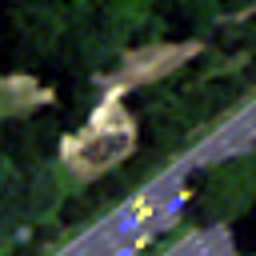